# Artificial Intelligence and Machine Learning

## Unit II


### Multi-Layer Perceptron and Introduction to Deep Learning

## My own latex definitions

$$\def\mbf#1{\mathbf{#1}}$$
$$\def\bmf#1{\boldsymbol{#1}}$$
$$\def\bx{\mbf{x}}$$
$$\def\bv{\mbf{v}}$$
$$\def\bz{\mbf{z}}$$
$$\def\bmu{\bmf{\mu}}$$
$$\def\bsigma{\bmf{\Sigma}}$$
$$\def\Rd#1{\in \mathbb{R}^{#1}}$$
$$\def\chain#1#2{\frac{\partial #1}{\partial #2}}$$
$$\def\loss{\mathcal{L}}$$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


# Aux functions

def plot_grid(Xs, Ys, axs=None):
    ''' Aux function to plot a grid'''
    t = np.arange(Xs.size) # define progression of int for indexing colormap
    if axs:
        axs.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        axs.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        axs.axis('scaled') # axis scaled
    else:
        plt.plot(0, 0, marker='*', color='r', linestyle='none') #plot origin
        plt.scatter(Xs,Ys, c=t, cmap='jet', marker='.') # scatter x vs y
        plt.axis('scaled') # axis scaled
        
def linear_map(A, Xs, Ys):
    '''Map src points with A'''
    # [NxN,NxN] -> NxNx2 # add 3-rd axis, like adding another layer
    src = np.stack((Xs,Ys), axis=Xs.ndim)
    # flatten first two dimension
    # (NN)x2
    src_r = src.reshape(-1,src.shape[-1]) #ask reshape to keep last dimension and adjust the rest
    # 2x2 @ 2x(NN)
    dst = A @ src_r.T # 2xNN
    #(NN)x2 and then reshape as NxNx2
    dst = (dst.T).reshape(src.shape)
    # Access X and Y
    return dst[...,0], dst[...,1]


def plot_points(ax, Xs, Ys, col='red', unit=None, linestyle='solid'):
    '''Plots points'''
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='gray', linestyle="--")
    ax.axvline(x=0, color='gray',  linestyle="--")
    ax.plot(Xs, Ys, color=col)
    if unit is None:
        plotVectors(ax, [[0,1],[1,0]], ['gray']*2, alpha=1, linestyle=linestyle)
    else:
        plotVectors(ax, unit, [col]*2, alpha=1, linestyle=linestyle)

def plotVectors(ax, vecs, cols, alpha=1, linestyle='solid'):
    '''Plot set of vectors.'''
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        ax.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha, linestyle=linestyle, linewidth=2)

# Recap previous lecture
- Multi-Class Classification
- **SoftMax Regression** plus **Cross-Entropy Loss**


# Today's lecture
## Supervised, <ins>Parametric</ins> Models
#### Propaedeutic part for Deep Learning

### 0) Optimization in Deep Learning
### 1) Network Structure: Multi-Layer Perceptron (MLP) is a Fully-Connected Neural Net
### 2) Backpropagation 

# This lecture material is taken from

- [d2l.ai - Multi Variable Calculus](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html)
- [Karpathy (Tesla Machine Learning Directory) Lecture on Backprop](https://www.youtube.com/watch?v=i94OvYb6noo&t=2985s)
- [Stanford Neural Nets and Backprop lecture](https://www.youtube.com/watch?v=mpJ2bFF6o8s)
- [Stanford ML notes on Neural Nets](http://cs229.stanford.edu/summer2019/cs229-notes-deep_learning.pdf)
- [Stanford ML notes on Backprop](http://cs229.stanford.edu/notes-spring2019/backprop.pdf)
- [Animation from jermwatt.github.io  ](https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/3_8_Momentum.html)

# Deep Learning

### 0) Quick Intro to Optimization in Deep Learning
### 1) What is a Neural Net (just Multi-Layer Perceptron)
### 2) How to obtain gradients on the weights

# Gradient Descent or Batch GD

- Compute the gradient of the loss wrt to params for **all $n$ training samples**
- $\bmf{\theta} -\gamma \sum_{i=1}^n \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x}_i,y_i)$

# Stochastic Gradient Descent or SGD

- Compute the gradient of the loss wrt to params for **a single random training samples**
- $\bmf{\theta} -\gamma \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x}_i,y_i)$

# How to optimize a Neural Net - SGD over mini-batches


1. In-between Batch GD and SGD with a single sample
2. We load randomly $k$ samples over the $n$; usually $k$ is a power of 2.
    - mini batch of `32, 64, 128` but could also be `100`
3. $\bmf{\theta} -\gamma \sum_{i=1}^k \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x}_i,y_i)$
4. Practically you take your training set $\mathcal{X}$ and you **shuffle** it, then go over it $k$ by $k$. _Simulate uniform random sampling without replacement._
    - When the list is over, re-start and shuffle again.
5. When you have perfomed a full pass on the shuffled data, this is called an **EPOCH**
6. You can train NN over iterations or over **EPOCHS**

# NN training scheme -  Pseudo-code

```python
from random import shuffle
training = list(range(1,11)) # each index points to a training sample, could be a matrix x=HxWx3, label y
shuffle(training)
converge, it, max_it, k, epoch = False, 0, 100, 3, 0
while not converge and it < max_it: # you training convergence scheme
    print(f'[Epoch {epoch}]')
    for b in range(0, len(training), k): # Data Loader gives you a batch k x matrices
        mini_batch = training[b:b+k] # so mini-batch is a tensor HxWx3xk
        if len(mini_batch) != k: # a possible way of handling the offset
            continue
        print('SGD step taken over', mini_batch) # compute the loss/gradients and upate your model
        loss.backward()  # get the gradients
        optimizer.step() # incorporate in the model
        # check convergence and set it to True
        it += 1
    epoch += 1 # an epoch is done, we reshuffle the training set
    shuffle(training)
```

```python
> Original unshuffled training set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
> Training set [10, 8, 1, 2, 6, 4, 9, 7, 5, 3]
[Epoch 0]
SGD step taken over [10, 8, 1]
SGD step taken over [2, 6, 4]
SGD step taken over [9, 7, 5]
> Training set [1, 10, 6, 9, 3, 7, 8, 4, 5, 2]
[Epoch 1]
SGD step taken over [1, 10, 6]
SGD step taken over [9, 3, 7]
SGD step taken over [8, 4, 5]
> Training set [6, 3, 10, 5, 9, 8, 4, 7, 2, 1]
[Epoch 2]
SGD step taken over [6, 3, 10]
SGD step taken over [5, 9, 8]
SGD step taken over [4, 7, 2]
> Training set [1, 2, 5, 10, 6, 7, 9, 8, 3, 4]
[Epoch 3]
SGD step taken over [1, 2, 5]
SGD step taken over [10, 6, 7]
SGD step taken over [9, 8, 3]
> Training set [2, 3, 1, 9, 6, 8, 4, 10, 7, 5]
[Epoch 4]
```

# Images - Mini-batch is a tensor `HxWx3xk`
### as an example with RGB images of size $H\times W$, you have a tensor that contains $k$ images in the mini-batch

# Video Frames - Mini-batch is a tensor `HxWx3xtxk` 
### as set of frames from a video, you have a tensor that contains $k$ frames over $t$ time instants of the videos in the mini-batch


In [3]:
from random import shuffle
training = list(range(1,11))
shuffle(training)
print('> Training set', training)
converge, it, max_it, k, epoch = False, 0, 100, 3, 0
while not converge and it < max_it: # you training converge scheme
    print(f'[Epoch {epoch}]')
    for b in range(0, len(training), k): # Data Loader
        mini_batch = training[b:b+k]
        if len(mini_batch) != k:
            continue
        print('SGD step taken over', mini_batch) # compute the loss and upate your model
        it += 1
    epoch += 1 # epoch is done we reshuffle the training set
    shuffle(training)
    print('> Training set', training)

> Training set [7, 1, 4, 6, 5, 10, 2, 9, 3, 8]
[Epoch 0]
SGD step taken over [7, 1, 4]
SGD step taken over [6, 5, 10]
SGD step taken over [2, 9, 3]
> Training set [1, 6, 9, 8, 10, 5, 4, 7, 2, 3]
[Epoch 1]
SGD step taken over [1, 6, 9]
SGD step taken over [8, 10, 5]
SGD step taken over [4, 7, 2]
> Training set [5, 8, 2, 6, 9, 10, 4, 7, 3, 1]
[Epoch 2]
SGD step taken over [5, 8, 2]
SGD step taken over [6, 9, 10]
SGD step taken over [4, 7, 3]
> Training set [7, 3, 8, 9, 1, 4, 10, 6, 5, 2]
[Epoch 3]
SGD step taken over [7, 3, 8]
SGD step taken over [9, 1, 4]
SGD step taken over [10, 6, 5]
> Training set [6, 3, 2, 7, 1, 5, 8, 10, 9, 4]
[Epoch 4]
SGD step taken over [6, 3, 2]
SGD step taken over [7, 1, 5]
SGD step taken over [8, 10, 9]
> Training set [8, 4, 3, 7, 5, 10, 6, 9, 2, 1]
[Epoch 5]
SGD step taken over [8, 4, 3]
SGD step taken over [7, 5, 10]
SGD step taken over [6, 9, 2]
> Training set [7, 2, 6, 10, 9, 4, 5, 3, 1, 8]
[Epoch 6]
SGD step taken over [7, 2, 6]
SGD step taken over [10, 

# 1) SGD over mini-batches


1. **<ins>Initialization - Very Important if the function is not strictly convex</ins>** 
$$\bmf{\theta} \sim \mathcal{N}(\cdot)~~~\text{omit details for now}$$ With NN random initialization from a distribution (There are different methods). **We do not set them all to zero**
2. Repeat until **convergence**:
    - Compute the gradient of the loss wrt to the parameters $\bmf{\theta}$ given **the mini-batch**
    - Take a small step in the opposite direction of steepest ascent **(so steepest descent).**<br/><br/>
     $$\bmf{\theta} \leftarrow  \bmf{\theta} -\sum_{i=1}^k \gamma \bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x},y)$$
3. When convergence is reached, you final estimate is in $\bmf{\theta}$

# Change of vocabulary - A bunch of training samples is a mini-batch

- We train NN **Stochastic Gradient Descent** over mini-batches with momentum (or variations thereof)
- When you train NN you 'sample' a mini-batch $\mbf{X}_b$ from your big dataset $\mbf{X}$.


Below this holds for the final linear layer:
$$ \underbrace{\mbf{Y}}_{\mathbb{R}^{Kxn}} = \underbrace{\mbf{W}}_{\mathbb{R}^{K\times d}}\underbrace{\mbf{X}_b}_{\mathbb{R}^{d\times n}} + \underbrace{\mbf{b}}_{\mathbb{R}^K}$$

# Mini-Batch, Visually

<center><img src=figs/minibatch.png width='70%'></center>

# Mini-Batch SGD vs ~~[Batch]~~ GD

Loss in NN in **non-convex** with lots of local-minima so stochasticity adds noise that let the optmization escape from local minima.

<center><img src=figs/minibatch2.png width='70%'></center>

# Mini-batch is a sort of smoothing of the single point SGD

# There is another smoothing technique: Momentum

# Moving average

$$ \bmf{\mu}_{t} = {\frac{t-1}{t}}\bmf{\mu}_{t-1} + \frac{1}{t}\bmf{x}_{new}\quad \text{note} \quad \frac{t-1}{t}+\frac{1}{t}=1$$


<center><video controls src=https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/videos/animation_9.mp4 width='70%'></center>

# Momentum $\approx$ exponential average

<center><video controls src=https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/videos/animation_9.mp4 width='40%'></center>
    
<center><video controls src=https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/videos/animation_10.mp4 width='40%' ></center>

# Moving average

$$  \bmf{\mu}_{t} = {\frac{t-1}{t}}\bmf{\mu}_{t-1} + \frac{1}{t}\bmf{x}_{new}\quad \text{note} \quad \frac{t-1}{t}+\frac{1}{t}=1$$

# Exponential moving average used in SGD

$$\bmf{\mu}_{t+1} = \alpha\bmf{\mu}_{t} + (1-\alpha)\bmf{x}_{new} \quad 0 \le \alpha \le 1$$

**Top:** SGD: **Bottom:** SGD with momentum increasing memory of previous steps
<center><img src=figs/sgd_minibatch.png width='70%'/></center>

# SGD over mini-batches with Momentum

- We introduce an additional term **to remember what happened to the gradient in the
previous iteration.** 
- This memory dampens oscillations and smoothes out the gradient updates.
- The memory is implemented with a **exponential moving average**
- Usualy $\alpha$ (the memory param) is set to $0.9$, is a good value.


$$\bmf{\Delta}_{t} = \alpha\bmf{\Delta}_{t-1} + (1-\alpha)\underbrace{\sum_{i=1}^k\bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x}_i,y_i)}_{\text{new update}}$$

 $$\bmf{\theta} \leftarrow  \bmf{\theta} - \gamma \bmf{\Delta}_{t}$$

# SGD over mini-batches with Momentum


1. **Initialization - Very Important if the function is not strictly convex** 
$$\bmf{\theta} \sim \mathcal{N}~~~\text{omit details}$$ With NN random initialization from a distribution (There are different methods). **We do not set them all to zero**
2. Repeat until **convergence**:
    - Compute the gradient of the loss wrt to the parameters $\bmf{\theta}$ given **the mini-batch**
    - Take a small step in the opposite direction of steepest ascent **(so steepest descent).**<br/><br/>
$$\bmf{\Delta}_{t+1} = \alpha\bmf{\Delta}_{t} + (1-\alpha)\underbrace{\sum_{i=1}^k\bmf{\nabla}_{\bmf{\theta}}\mathcal{J}(\mbf{\theta};\mbf{x}_i,y_i)}_{\text{new update}}$$

 $$\bmf{\theta} \leftarrow  \bmf{\theta} - \gamma \bmf{\Delta}_{t+1}$$
3. When convergence is reached (or **EARLY STOPPING**), you final estimate is in $\bmf{\theta}$

# Loss Surface for Linear Regression $\ell_2^2$ loss with $d=2$ parameters in $\bmf{\theta}$

<center><img src=figs/loss_convex.png width='50%'/></center>

# Loss Surface for Linear Regression $\ell_2^2$ loss with $d=10$ parameters in $\bmf{\theta}$

If you increase the dimensionality of the input data $\mbf{x}$ and thus also those of the parameters $\bmf{\theta}$ we cann draw the loss surface anymore but loss **still remains convex, there is a single global optimum.** 
<center><b>Image the following below but in 10 dimensions!</b><center><img src=figs/loss_convex.png width='50%'/></center>

# With Deep Learning optimization is highly non-convex and params explode!

# Loss Surface for ResNet-20 with no skip connection on ImageNet

## ResNet-20, number of parameters $\bmf{\theta}$ of the order of.....millions!
### You will cover ResNet (residual connections) in Deep Learning course

Visualization of mode connectivity for ResNet-20 with no skip connections on ImageNet dataset. The visualization by Javier Ideami

<center><img src=https://izmailovpavel.github.io/curves_blogpost/images/image34.jpg width='50%'/></center>

Taken from [https://izmailovpavel.github.io/curves_blogpost/](https://izmailovpavel.github.io/curves_blogpost/)

[Video for the curious student](https://www.youtube.com/watch?time_continue=5&v=dqX2LBcp5Hs&feature=emb_title)


# Learning rate is very important
<br><br>
<center><img src=https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/steplength_1D.gif?raw=true width='85%'/></center>

# Babysitting the training process
### Loss in function of epochs

<center><img src=figs/differnt_losses.png width='40%'/></center>

# Valleys, Hills, Noisy Surface

<center><img src=https://izmailovpavel.github.io/curves_blogpost/images/image1.jpg width='80%'/></center>




# Dynamics  of Training

<center><img src='http://2.bp.blogspot.com/-q6l20Vs4P_w/VPmIC7sEhnI/AAAAAAAACC4/g3UOUX2r_yA/s400/s25RsOr%2B-%2BImgur.gif' width='30%'><center/>
    
_**Noisy moons**: This is logistic regression on noisy moons dataset from sklearn which shows the smoothing effects of momentum based techniques (which also results in over shooting and correction). The error surface is visualized as an average over the whole dataset empirically, but the trajectories show the dynamics of minibatches on noisy data. The bottom chart is an accuracy plot._
    
[taken from here](http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html)

# Dynamics  of Training

<center><img src='http://3.bp.blogspot.com/-nrtJPrdBWuE/VPmIB46F2aI/AAAAAAAACCw/vaE_B0SVy5k/s400/Long%2BValley%2B-%2BImgur.gif' width='30%'><center/>
   
_**Long valley**: Algos without scaling based on gradient information really struggle to break symmetry here - SGD gets no where and Nesterov Accelerated Gradient / Momentum exhibits oscillations until they build up velocity in the optimization direction. Algos that scale step size based on the gradient quickly break symmetry and begin descent._

# Just to give you an hint on where the community is headed with Deep Learning

# DALL-E OpenAI (January 2021)
<br><br>
<center><img src=figs/dalle.png ></center>

# DALL-E OpenAI 

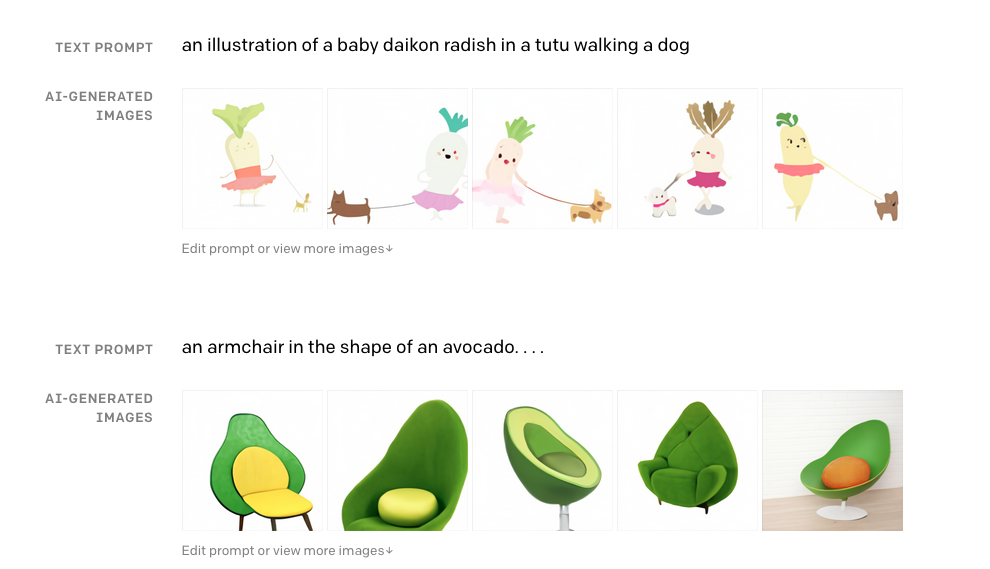

# OpenAI DALL-E - 12-billion parameters trained with self-supervision

Yikes! $12\times 10^9$ floating points parameters to train

> DALL·E is a **12-billion parameter** version of GPT-3 trained to generate images from text descriptions, using a dataset of text–image pairs. We’ve found that it has a diverse set of capabilities, including creating anthropomorphized versions of animals and objects, combining unrelated concepts in plausible ways, rendering text, and applying transformations to existing images.

### ~~0) Quick Intro to Optimization in Deep Learning~~
### 1) Network Structure: Multi-Layer Perceptron (MLP) is a Fully-Connected Neural Net
### 2) Backpropagation 

# 1) Network Structure: Multi-Layer Perceptron (MLP) 
# is a Fully-Connected Neural Net

# Networks and Topics that we do NOT cover

You will meet them at **Deep Learning** course

- **Convolutional** Neural Nets (good for images or any matrix data like as input)
- Generative Adversarial Networks **(GAN)** and adversarial training
- AutoEncoders or Variational Autoencoders
- Adversarial Attacks to NN
- Recurrent Neural Nets (RNN such as GRU, LSTM)
- Transformer Networks

# Let's go back to single layer, linear soft-max regression or linear neural network

# Let's recall last classification layer of a neural net as pipeline
## $\mbf{x} \implies \mbf{z}= \mbf{W}\mbf{x} + \mbf{b} \implies e^{\mbf{z}}  \implies \mbf{p} = \frac{e^{\mbf{z}}}{\sum_k e^{\mbf{z}}} \implies -\ln(\mbf{p}_y) $

# Representation of a Single Layer

Let's consider our linear softmax regressor

$$ \underbrace{\mbf{z}}_{\mathbb{R}^{Kx1}} = \underbrace{\mbf{W}}_{\mathbb{R}^{K\times d}}\underbrace{\mbf{x}}_{\mathbb{R}^{d\times1}} + \underbrace{\mbf{b}}_{\mathbb{R}^K}$$

We interpret as **Linear Layer** $\mathbf{W} \mathbf{x}+\bmf{b}$  followed by  **Non-Linear Activation function** $\sigma$

$$
\sigma(\mathbf{W} \mathbf{x}  + \bmf{b})=\sigma \circ\left(\begin{array}{cccc}
w_{11} & w_{12} & \cdots & w_{1 d} \\
w_{21} & w_{22} & \cdots & w_{2 d} \\
\vdots & \cdots & \ddots & \vdots \\
w_{k 1} & w_{m 2} & \cdots & w_{k d}
\end{array}\right)\left(\begin{array}{c}
x_{1} \\
x_{2} \\
\vdots \\
x_{d}
\end{array}\right)+
\left(\begin{array}{c}
b_{1} \\
b_{2} \\
\vdots \\
b_{k}
\end{array}\right)
=\sigma \circ\left(\begin{array}{c}
z_{1} \\
z_{2} \\
\vdots \\
z_{k}
\end{array}\right)
$$

# Representation of a Single Layer

$$
\sigma(\mathbf{W} \mathbf{x}  + \bmf{b})=\sigma \circ\left(\begin{array}{cccc}
\underline{w_{11}} & \underline{w_{12}} & \cdots & \underline{w_{1 d}} \\
w_{21} & w_{22} & \cdots & w_{2 d} \\
\vdots & \cdots & \ddots & \vdots \\
w_{k 1} & w_{m 2} & \cdots & w_{k d}
\end{array}\right)\left(\begin{array}{c}
x_{1} \\
x_{2} \\
\vdots \\
x_{d}
\end{array}\right)+
\left(\begin{array}{c}
b_{1} \\
b_{2} \\
\vdots \\
b_{k}
\end{array}\right)
=\sigma \circ\left(\begin{array}{c}
z_{1} \\
z_{2} \\
\vdots \\
z_{k}
\end{array}\right)
$$


<br><br>
<center><img src='figs/neuron.png' width='70%'/></center>

# Representation of a Single Layer

$$
\sigma(\mathbf{W} \mathbf{x}  + \bmf{b})=\sigma \circ\left(\begin{array}{cccc}
{w_{11}} & {w_{12}} & \cdots & {w_{1 d}} \\
w_{21} & w_{22} & \cdots & w_{2 d} \\
\vdots & \cdots & \ddots & \vdots \\
\underline{w_{k 1}} & \underline{w_{m 2}} & \cdots & \underline{w_{k d}}
\end{array}\right)\left(\begin{array}{c}
x_{1} \\
x_{2} \\
\vdots \\
x_{d}
\end{array}\right)+
\left(\begin{array}{c}
b_{1} \\
b_{2} \\
\vdots \\
b_{k}
\end{array}\right)
=\sigma \circ\left(\begin{array}{c}
z_{1} \\
z_{2} \\
\vdots \\
z_{k}
\end{array}\right)
$$


<br><br>
<center><img src='figs/neuron_2.png' width='70%'/></center>

# Representation of a Single Layer: Linear plus non-Linear

$$
\sigma(\mathbf{W} \mathbf{x}  + \bmf{b})=\sigma \circ\left(\begin{array}{cccc}
{w_{11}} & {w_{12}} & \cdots & {w_{1 d}} \\
w_{21} & w_{22} & \cdots & w_{2 d} \\
\vdots & \cdots & \ddots & \vdots \\
\underline{w_{k 1}} & \underline{w_{m 2}} & \cdots & \underline{w_{k d}}
\end{array}\right)\left(\begin{array}{c}
x_{1} \\
x_{2} \\
\vdots \\
x_{d}
\end{array}\right)+
\left(\begin{array}{c}
b_{1} \\
b_{2} \\
\vdots \\
b_{k}
\end{array}\right)
=\sigma \circ\left(\begin{array}{c}
z_{1} \\
z_{2} \\
\vdots \\
z_{k}
\end{array}\right)
$$


<br><br>
<center><img src='figs/neuron_3.png' width='70%'/></center>

# Representation of a Single Layer: Linear plus non-Linear

$$
\mathbf{W} \mathbf{x}=\left(\begin{array}{c}
-\text { unit - } \\
\vdots \\
-\text { unit }-
\end{array}\right)\left(\begin{array}{c}
\mid \\
\mathbf{x} \\
\mid
\end{array}\right)
$$


<br><br>
<center><img src='figs/neuron_4.png' width='70%'/></center>

# Representation as a computational graph

<center><img src=figs/com_graph.png width='80%'/></center>

# Damn, until now is all linear. So now the "Deep"!

- Damn, until now is all linear.
- Our **beloved SoftMax+CE linear layer** is there **in the end (classifier).**


<center><img src=https://www.datasciencecentral.com/wp-content/uploads/2021/10/1-19.png width='70%'/></center>


# Question: A Single Linear Soft-Max Layer may suffer from Bias or Variance problem? 

# A single linear layer is not enough for highly  non-linear problems

<br><br>
<center><img src='https://media-exp1.licdn.com/dms/image/C5112AQEt1wEHRWi21w/article-cover_image-shrink_600_2000/0/1533914799998?e=2147483647&v=beta&t=GsPd5qJePijN7BPx2BEkNiu2OmcixkJGFA5u_XjukVg' width='50%'></center>

# Adding another non-linear layer before the classifier

- We improve the _expressivness_ of our learned function by adding another linear layer **before** the classification layer.
- Think this new layer as a feature map $\mbf{x}  \mapsto \phi(\mbf{x})$; it maps our attribute to a feature space
- Now the classifier does not classify anymore directly $\mbf{x}$ but the feature $\phi(x)$.
- Sorry, notation becomes complex. Upper script means layer index; lower-script selects the unit
- $\mathbf{W}^1 \in \mathbb{R}^{d\times p}$, $\bmf{b}^1 \in \mathbb{R}^{p}$ so then $\mathbf{W}^2 \in \mathbb{R}^{p\times k}$,   $\bmf{b}^2 \in \mathbb{R}^{k}$

$$\mbf{p}=\sigma(\mathbf{W}^2\underbrace{\left(\sigma(\mathbf{W}^1 \mathbf{x}  + \bmf{b}^1) \right)}_{\bmf{\phi}(x)}   + \bmf{b}^2)$$

$$\text{dim. analysis:} \quad d \mapsto p \mapsto k$$

# $\mathbf{W}^1 \in \mathbb{R}^{d\times p}$ is an Hidden Layer

Because it maps the original attribute in $d$ from an dimensionality $p$ and then $p$ is used for classifying.

A priori you do not know what $\mathbf{W}^1$ may learn.

$$\mbf{p}=\sigma(\mathbf{W}^2\underbrace{\left(\sigma(\mathbf{W}^1 \mathbf{x}  + \bmf{b}^1) \right)}_{\bmf{\phi}(x)}   + \bmf{b}^2)$$

$$\text{dim. analysis:} \quad d \mapsto p \mapsto k$$

# Let's update our visualizations

# Multi-Layer Perceptron (MLP) with one hidden layer

## Given the nature of these layers, they're called Fully-Connected NN

<br><br>
<center><img src='figs/neuron_5.png' width='70%'/></center>

# Multi-Layer Perceptron with one hidden layer
<br><br>
<center><img src='figs/neuron_6.png' width='90%'/></center>

# Non-linear activation functions:  Sigmoid

Very important: **Activation Functions are computed element-wise.**

$$ \sigma(z)= \frac{1}{1+\exp^{-z}} \quad \text{sigmoid or logistic function}$$


# Non-linear activation functions:  Sigmoid

Very important: **Activation Functions are computed element-wise.**

$$ \sigma(z)= \frac{1}{1+\exp^{-z}} \quad \text{sigmoid or logistic function}$$
<br><br> <center>Smooth and Differentiable alternative to sign</center>

{{import numpy as np; import matplotlib.pyplot as plt; step=0.1; x = np.arange(-20.0, 20.0, step); fig, axes = plt.subplots(1,2,figsize=(12,5)); y = 1/(1+np.exp(-x)); dy = np.diff(y); axes[0].plot(x,y); axes[0].legend(['sigmoid']); axes[1].plot(x[1:],dy/step); _=axes[1].legend(['derivative of sigmoid']);}}


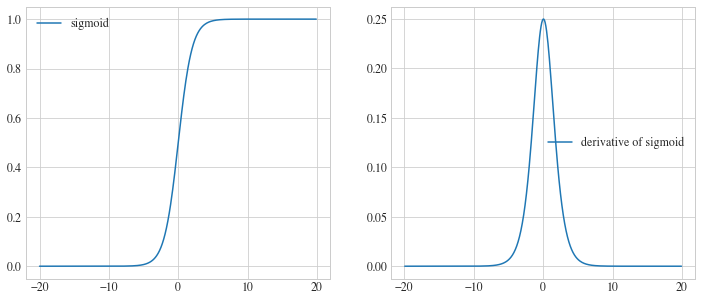

In [4]:
import numpy as np;
import matplotlib.pyplot as plt; step=0.1;
x = np.arange(-20.0, 20.0, step);
fig, axes = plt.subplots(1,2,figsize=(12,5));
y = 1/(1+np.exp(-x));
dy = np.diff(y);
axes[0].plot(x,y)
axes[0].legend(['sigmoid'])
axes[1].plot(x[1:],dy/step);
axes[1].legend(['derivative of sigmoid']);

# Non-linear activation functions:  ReLu - Rectified Linear Unit

Very important: **Activation Functions are computed element-wise.**

$$ \sigma(z)= \max(0,z) \quad \text{ReLu}$$
<br> <center>ReLu is piece-wise linear function</center>
{{import numpy as np; import matplotlib.pyplot as plt; step=0.1; x = np.arange(-20.0, 20.0, step); fig, axes = plt.subplots(1,2,figsize=(12,5)); y = np.maximum(0,x); dy = np.diff(y); axes[0].plot(x,y); axes[1].plot(x[1:],dy/step); axes[0].legend(['ReLu']); _=axes[1].legend(['Deriv of ReLU']);}}

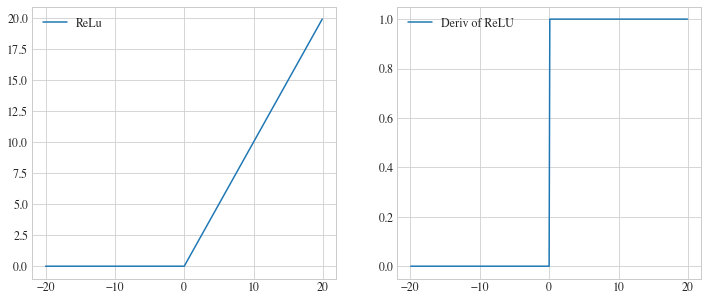

In [5]:
import numpy as np;
import matplotlib.pyplot as plt; step=0.1;
x = np.arange(-20.0, 20.0, step);
fig, axes = plt.subplots(1,2,figsize=(12,5));
y = np.maximum(0,x);
dy = np.diff(y);
axes[0].plot(x,y)
axes[1].plot(x[1:],dy/step);
axes[0].legend(['ReLu'])
_=axes[1].legend(['Deriv of ReLU']);

# Sigmoid

- Used to model output probability
- Nowdays not used in middle layers
- Have to compute $\exp()$
- **Vanishing gradients** for large input magnitude

# ReLU

- Computationally efficient (no exp!)
- No vanishing gradients but do not let pass gradients for negative values
- Converge much faster than sigmoid (6x)
- Not differentiable in zero (subgradients)

# There are other activation functions we do not cover
###  TanH, Leaky ReLU, parametrized ReLU, ELU

# Exam question lookalike

How many **trainable parameters** do you have with a **MLP** with input features in $\mathbb{R}^d$, a first layer with $p$ units/neurons and another layer with $k$ units/neurons that model the  $k$ classes for classification.
Assume all layers have the bias term.

# Exam question lookalike

We have two layers:
1. Maps $d$ dimension to $p$ with bias also. So we need to train $\underbrace{d \times p}_{weights}$ + $\underbrace{p}_{bias}$ parameters
2. Maps $p$ dimension to $k$ with bias also.  So we need to train $\underbrace{p \times k}_{weights}$ + $\underbrace{k}_{bias}$ parameters

**Total params =** $(d \times p + p ) +(p \times k + k )$

so if $d=100$, $p=2000$, and $k=10$. **Total params = 222,010**

# Adding Layers improve the expressiveness of the function
### Example with ReLU

1 layers

<center><img src=figs/relu1.png width='70%'/></center>

2 layers

<center><img src=figs/relu2.png width='70%'/></center>

3 layers

<center><img src=figs/relu3.png width='70%'/></center>

# Neural Net Initialization

### Why we do not initialize all weights and biases to zero?

Consider $\sigma$ as **Sigmoid activation function** everywere, what happens if $\mbf{W}$ are zeros?

No matter what is the input, the output will be always $\sigma(0)=0.5$, in other words a **constant vector.**

$$
\begin{aligned}
&\mbf{z}^{[1]}=\mbf{W}^{[1]} \mbf{x}^{(i)}+\mbf{b}^{[1]} \\
&\mbf{a}^{[1]}=\sigma\left(\mbf{z}^{[1]}\right) \\
&\mbf{z}^{[2]}=\mbf{W}^{[2]} \mbf{a}^{[1]}+\mbf{b}^{[2]} \\
&\mbf{a}^{[2]}=\sigma\left(\mbf{z}^{[2]}\right) \\
&\mbf{z}^{[3]}=\mbf{W}^{[3]} \mbf{a}^{[2]}+\mbf{b}^{[3]} \\
&\hat{y}^{(i)}=\mbf{a}^{[3]}=\sigma\left(\mbf{z}^{[3]}\right)
\end{aligned}
$$

### OK, so we will initialize the weights to a constant value different than zero? Will this work?

**NO, it won't!**

Each element of the activation vector will be a scaled version of the input. This behavior will occur at all layers of the neural network. As a result, when we compute the gradient, all neurons in a layer will be equally responsible for anything contributed to the final loss. **We call this property symmetry.**

This means each neuron (within a layer) will receive the **exact same gradient update value (i.e., all neurons will learn the same thing).**

# Random Asymmetric Initialization is needed

Randomness breaks the symmetric so that each neuran learns different things (gradients updates are different).

$$\mbf{W}_{ij} \sim \mathcal{U}(-0.1,0.1)$$
$$\mbf{W}_{ij} \sim \mathcal{N}(0,0.01)$$

### Xavier/He Initialization

$$\mbf{W}^l_{ij} \sim \mathcal{N}\Big(0,\sqrt{\frac{2}{n^l+n^{l-1}}}\Big)$$

- $n^l$ is the **number of neurons** in the layer $l$-th
- $n^{l-1}$ is the **number of neurons** in the layer $l-1$-th (previous layer to $l$).


**Idea:** For a single layer, consider the variance of the input to the layer
as $\sigma^{in}$ and the variance of the output (i.e., activations) of a layer to be
$\sigma^{out}$. Xavier/He initialization encourages  $\sigma^{in}$ to be similar to $\sigma^{out}$.

# We can have more than 3 layers

In principle, we can compose how many layers we want.

Think of each layer has **learning a feature map on top of the previous feature map and then you have your final layer for your task at hand (classification, regression)**

$$
\mathbf{y}=f \circ(\sigma \circ f) \circ \cdots \circ(\sigma \circ f)(\mathbf{x})
$$

<center><img src=https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/function_approx_NN.gif?raw=true width='60%'/></center>

# Universal Approximation Theorem [Informal]

Given a continous function $\mbf{y}=f(\mbf{x})$ where $\mbf{x} \in \mathbb{R}^d$ and $\mbf{y} \in \mathbb{R}^k$, considering only a bounded region of $\mbf{x}$, **there exists** a single-hidden-layer NN$_\theta$ with a **finite number of neurons/units in the hidden layer**, such that:

$$\vert f(\mbf{x}) -  NN_\theta(\mbf{x}) \vert \le \epsilon $$
<br><br>
<center><img src="https://jermwatt.github.io/machine_learning_refined/mlrefined_images/nonlinear_superlearn_images/2_layer_neural_network.png" width='40%'></center>

1. We do not know how to reach that $NN_\theta(\mbf{x})$
2. It does not tell you how many samples you need to recover the approximation.

### ~~0) Quick Intro to Optimization in Deep Learning~~
### ~~1) Network Structure: Multi-Layer Perceptron (MLP) is a Fully-Connected Neural Net~~
### 2) Backpropagation 

# Backpropagation and Differential Programming

# NN can be huge composition of functions! 😱
<center><img src=figs/vggs.jpg width='35%'/></center>



# Three ways of computing the gradients $\nabla_{\mbf{w}}\mathcal{L}(x,y;\mbf{w})$

1. **Manually** (if we change the network, we have to adjust it for a 100 layer neural net) maybe not a good idea, does not scale, even if we use symbolic derivation tools such as Mathematica ✍🏼
2. **Finite Difference** good to check the gradients once you have an automatic way of computing it; **very slow, unfeasible in training!** 👩🏾‍💻
3. **Backpropagation**: application of chain rule of calculus to tensors with a computational graph with caching **(differential programming with automatic differentiation)** 💻

# Infeasible to derive manully the gradient update

# Finite difference (very slow!) but used for gradient check

- It could  be used to check if your backpropagation chain is correct
- It is not used when you train; computationally expensive

Implement the definition of derivative and apply it numerically on vectors:

$$\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.$$

# Finite difference (very slow!) but used for gradient check

How do we read this formula for finite difference with neural net?

Assume $\mathbf{W}$ is your matrix and $w=\mathbf{W}_{ij}$ is a scalar inside your matrix.

For `i,j=1....dims`:
1. $w=\mathbf{W}_{ij}$
1. **Evaluate your NN loss at current weight value `L(w)`**
2. You want to see what is the impact of a paramter $w$ on the loss?
3. Perturb that $w$ by an $\epsilon=1e-5$ and evaluate the new loss at `L(w+eps)`
4. **Numerical Gradient is `[L(w+eps)-L(w)]/eps`** at position ij, so store it in $\nabla_{\mbf{W}}\mathcal{L}_{ij}$

$$\frac{\partial\mathcal{L}}{\partial w}(x,y;w)= \frac{L(w+\epsilon) - L(w)}{\epsilon}$$

At the end you have your **numerical gradients** $\nabla_{\mbf{W}}\mathcal{L}_{ij}$.

# Backpropagation

# Who invented Backpropagation

https://people.idsia.ch/~juergen/who-invented-backpropagation.html


# Let's be clear on what we need to compute

$\forall l \in [1\ldots,L]$:
1. $\nabla_{\mbf{W}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
1. $\nabla_{\mbf{b}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
<br><br>
<center><img src='figs/neuron_6.png' width='90%'/></center>

# Once you have gradients on ALL weights $\implies$ We can update

$\forall l \in [1\ldots,L]$:
1. $\mbf{W}^l \leftarrow \mbf{W}^l - \gamma \nabla_{\mbf{W}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
1. $\mbf{b}^l \leftarrow \mbf{b}^l - \gamma \nabla_{\mbf{b}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
<br><br>


<center><img src=figs/graph_02.png width='90%'/></center>

# How do we get all the weights?

[Mostly taken from here](https://www.youtube.com/watch?v=i94OvYb6noo)

# Chain Rule

Returning to functions of a single variable,
suppose that $y = f(g(x))$
and that the underlying functions 
$y=f(u)$ and $u=g(x)$ 
are both differentiable.
The chain rule states that 


$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$


What is the **derivative of loss wrt to x in the equation below**? $$y = loss\big(g(h(i(x)))\big)$$

$$\frac{\partial loss}{\partial x} = \frac{\partial loss}{\partial g} \frac{\partial g}{\partial h}\frac{\partial h}{\partial i}\frac{\partial i}{\partial x}$$

# Autodiff

### pytorch = numpy + autodiff
In pytorch this mechanism is called **autograd**

# Let's consider quadratic form

$$f(\mbf{x}) =  \mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c$$

# Let's consider quadratic form

$$f_{\mbf{A},\mbf{b},c}(\mbf{x}) =  \mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c$$

# Let's consider quadratic form

Can be view as function of:
- input $\mbf{x}$; fixing $\mbf{\theta} \rightarrow$  _Used when we study how our model reacts to perturbation of input_
- input $\mbf{\theta}$; fixing $\mbf{x} \rightarrow$ (training set is given, find the weights) _Used when we learn_

$$f(\mbf{x};\mbf{\theta}) =  \mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c \qquad \text{where}~~~~~\mbf{\theta}={\mbf{A},\mbf{b},c}$$

# Let's consider quadratic form

$$f(\mbf{\theta};\mbf{x}) =  \mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c \qquad \text{where}~~~~~\mbf{\theta}={\mbf{A},\mbf{b},c}~\text{are fixed}$$

# Let us code this function with Pytorch



In [1]:
import torch
import random
random.seed(0) # to fix the random seed to make the code deterministic
torch.manual_seed(0) # to fix the random seed to make the code deterministic
print(torch.__version__)

1.4.0


We assume the parameters $\mbf{\theta}$ as given and fix and we optimize the input $\mbf{x}$. 

We assume $\mbf{x} \in \mathbb{R}^2$.

In [2]:
## params
A = torch.tensor([[0., 2.], [2.,0.]]) # 2x2
b = torch.tensor([[-0.5],[ 0.5]])  # 2x1
c = torch.tensor([-2.], dtype=torch.float32) # 1x1
## input
x = torch.tensor([1., 1.], requires_grad=True) # 1x2 Note how here we require the gradients
thetas = (A, b, c) # pack the parameters

In [3]:
A.shape, b.shape, c.shape, x.shape

(torch.Size([2, 2]), torch.Size([2, 1]), torch.Size([1]), torch.Size([2]))

In [4]:
thetas

(tensor([[0., 2.],
         [2., 0.]]),
 tensor([[-0.5000],
         [ 0.5000]]),
 tensor([-2.]))

# Let's edit it a bit:

$$f(\mbf{\theta};\mbf{x}) =  \big( \mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c \big)^2 \qquad \text{where}~~~~~\mbf{\theta}={\mbf{A},\mbf{b},c}~\text{are fixed}$$

# Code in pytorch

In [5]:
def function(x, thetas):
    A, b, c = thetas
    return torch.pow(x.T @ A @ x + b.T@x + c, 2)

# What pytorch does under the hood

<center><img src="figs/quad_pytorch_00.png" width='30%' ></center>

<center><img src="figs/quad_pytorch_01.png" width='30%' ></center>

<center><img src="figs/quad_pytorch_02.png" width='45%' ></center>

<center><img src="figs/quad_pytorch_03.png" width='45%' ></center>

<center><img src="figs/quad_pytorch_04.png" width='45%' ></center>

<center><img src="figs/quad_pytorch_05.png" width='45%' ></center>

# Optimize $\mbf{x}$ with SGD

In [6]:
for epoch in range(200):
    func_v = function(x, thetas) # eval function and track gradients (autograd)
    func_v.backward() # get the grads
    if epoch % 20 == 0:
        print(f'{epoch}) y before SGD = ',func_v.item(),'input x=',x.detach().numpy())
    with torch.no_grad(): # here we DO not track gradient
        x += -1e-6*x.grad # plain SGD
        if epoch % 20 == 0:
            print(f'{epoch}) y after SGD  = ',function(x,thetas).item(), 
                  'input x=',x.detach().numpy())

0) y before SGD =  4.0 input x= [1. 1.]
0) y after SGD  =  3.9994802474975586 input x= [0.999986 0.999982]
20) y before SGD =  3.8920207023620605 input x= [0.99706876 0.9962302 ]
20) y after SGD  =  3.881356716156006 input x= [0.9967766 0.9958543]
40) y before SGD =  3.5918643474578857 input x= [0.98865247 0.9853944 ]
40) y after SGD  =  3.572390556335449 input x= [0.988092  0.9846722]
60) y before SGD =  3.1364998817443848 input x= [0.9750316  0.96782047]
60) y after SGD  =  3.1105704307556152 input x= [0.9742212  0.96677345]
80) y before SGD =  2.579484701156616 input x= [0.9566447 0.9440253]
80) y after SGD  =  2.550053119659424 input x= [0.9556099 0.9426837]
100) y before SGD =  1.9817947149276733 input x= [0.93405545 0.91468066]
100) y after SGD  =  1.9519323110580444 input x= [0.93282706 0.91308147]
120) y before SGD =  1.4024567604064941 input x= [0.90791243 0.88057077]
120) y after SGD  =  1.3749147653579712 input x= [0.9065243  0.87875533]
140) y before SGD =  0.89095729589462

# Gradient Flow

<center><img src="figs/quad_pytorch_06.png" width='30%' ></center>

In [7]:
function(x, thetas).item()

0.03883099555969238

In [8]:
x.T @ A @ x + b.T@x + c

tensor([0.1971], grad_fn=<AddBackward0>)

In [9]:
x

tensor([0.7815, 0.7137], requires_grad=True)

# What we have found

The point $\mbf{x}=[0.7815, 0.7137]$ satisfies approximatively $\mbf{x}^\top\mbf{A}\mbf{x} + \mbf{b}^\top\mbf{x} + c \approx 0 \quad (0.1971)$

# torch.no_grad()

```python
with torch.no_grad(): # we do not track the backward pass
    code that uses the function...
```
In the DAG we only **do topological sorting forwarding** (no backward).

In [11]:
with torch.no_grad():
    f = function(x, thetas)
print(f, '\n\n-->if you see in the tensor, there is NO grad_fn=<AddBackward0>) as before')

tensor([0.0378]) 

-->if you see in the tensor, there is NO grad_fn=<AddBackward0>) as before


# Fine-tuning (freezing parameters in an NN)

```python
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False
```

# torch.detach()

In [12]:
def function(x, thetas):
    A, b, c = thetas
    quad = x.T @ A @ x
    linear_detached = (b.T@x).detach() # detaching b*x
    return torch.pow( quad + linear_detached + c, 2)

# Gradient Flow

<center><img src="figs/quad_pytorch_06.png" width='70%' ></center>

# Gradient Flow with Detach

<center><img src="figs/quad_pytorch_07.png" width='70%' ></center>

# Chain Rule on Directed Acyclic Graph (DAG)

# Let us make an easier example

### Automate the computation of derivatives with computer science



$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

The high school way

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  ?$$

$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

The high school way (as we did until now):

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  (\mbf{x}z+yz)^{\prime}=(\mbf{x}z)^{\prime}+(yz)^{\prime} = z$$
$$\frac{\partial\mathcal{L}(x,y,z)}{\partial y} =  (xz+\mbf{y}z)^{\prime}=(xz)^{\prime}+(\mbf{y}z)^{\prime} = z$$
$$\frac{\partial\mathcal{L}(x,y,z)}{\partial z} =  x+y $$

# Now with Chain Rule
$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

but we can re-write it with the chain rule:

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  \big(\underbrace{(\mbf{x}+y)}_{q}z\big)^{\prime}=\frac{\partial\mathcal{L}}{\partial q}\frac{\partial q}{\partial x}$$

# Now with Chain Rule
$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

but we can re-write it with the chain rule:

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  \big(\underbrace{(\mbf{x}+y)}_{q}z\big)^{\prime}=\frac{\partial\mathcal{L}}{\partial q}\frac{\partial q}{\partial x} = z\frac{\partial q}{\partial x} $$

# Now with Chain Rule
$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

but we can re-write it with the chain rule:

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  \big(\underbrace{(\mbf{x}+y)}_{q}z\big)^{\prime}=\frac{\partial\mathcal{L}}{\partial q}\frac{\partial q}{\partial x} = z\cdot 1= z $$

# Chain Rule on Directed Acyclic Graph (DAG)

$$\mathcal{L}(x,y,z) = (x+y)z$$

$$x=-2;~y=5;~z=-4;$$

**The computer science way:**

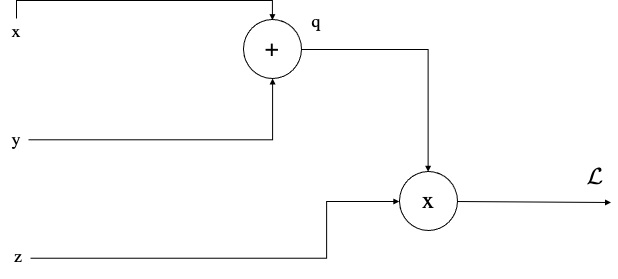

$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

# Chain Rule on Directed Acyclic Graph (DAG)
Even if the problem is very small, we break it down to subproblem so that we can **automate** it:


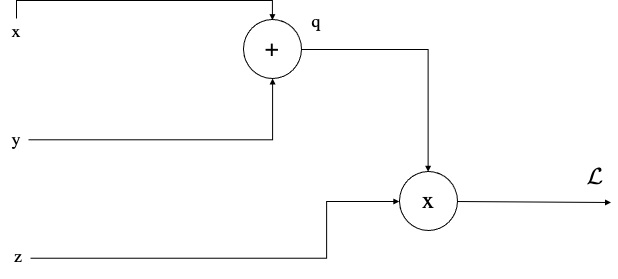

$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$
 Who is input of $\mathcal{L}$?

$q$ and $z$ are input of $\mathcal{L}$.
$$\frac{\partial\mathcal{L}}{\partial q}, \frac{\partial\mathcal{L}}{\partial z}$$

# Chain Rule on Directed Acyclic Graph (DAG)
Even if the problem is very small, we break it down to subproblem so that we can **automate** it:
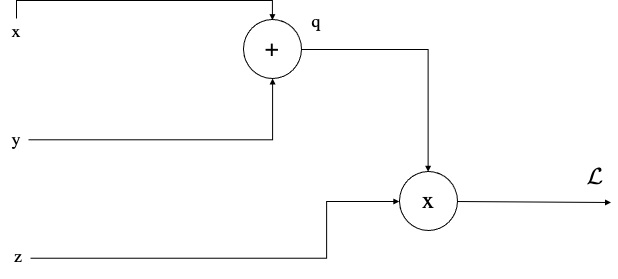


$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

What is the derivate? (Just check the operation at the gate)
$$\frac{\partial\mathcal{L}}{\partial q}, \frac{\partial\mathcal{L}}{\partial z}$$

# Chain Rule on Directed Acyclic Graph (DAG)
Even if the problem is very small, we break it down to subproblem so that we can **automate** it:
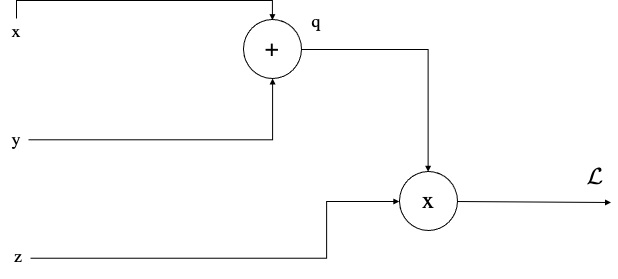



$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

What is the derivate? (Just check the operation at the gate)?
$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q$$

# Chain Rule on Directed Acyclic Graph (DAG)
Even if the problem is very small, we break it down to subproblem so that we can **automate** it:
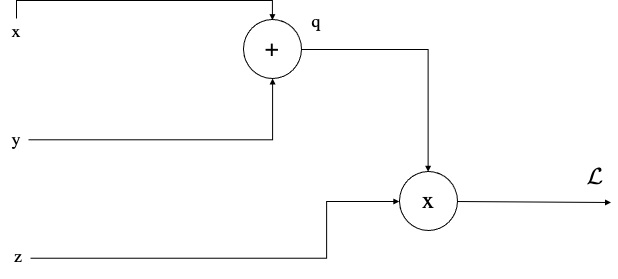



$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

What is the derivate? (Just check the operation at the gate)?
$$\frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Chain Rule on Directed Acyclic Graph (DAG)
Even if the problem is very small, we break it down to subproblem so that we can **automate** it:
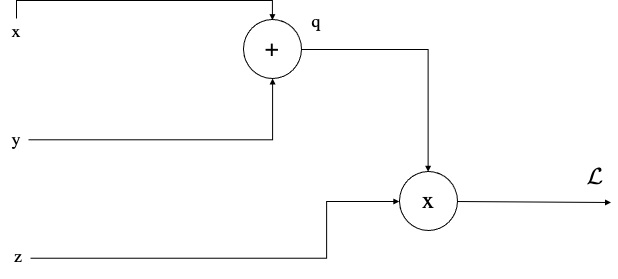



$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

OK now we have all the **analytical "local" partial derivatives, we can compute something**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Forward Pass

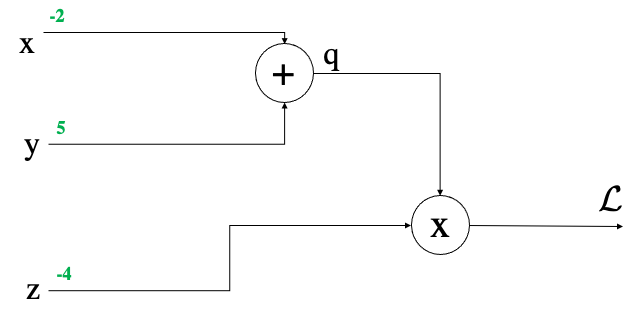



$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

OK now we have all the **analytical partial derivatives, we can compute something**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Forward Pass

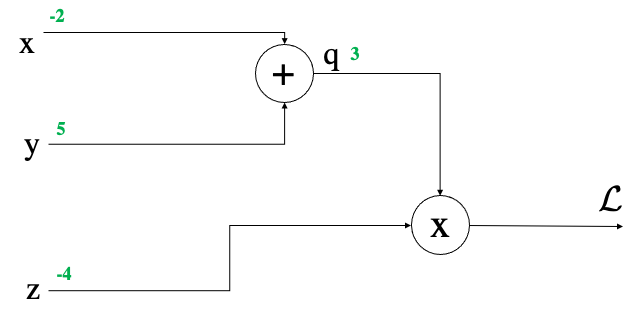



$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

OK now we have all the **analytical partial derivatives, we can compute something**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Forward Pass

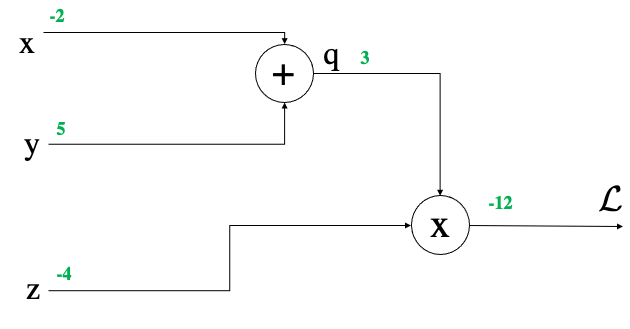


**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

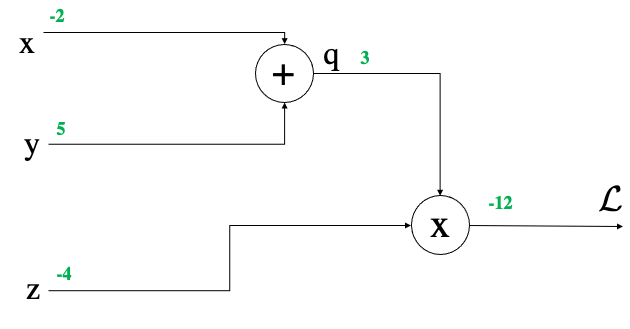

**Act as a base case for the recursion:** $$\frac{\partial\mathcal{L}}{\partial \mathcal{L}}=?$$

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

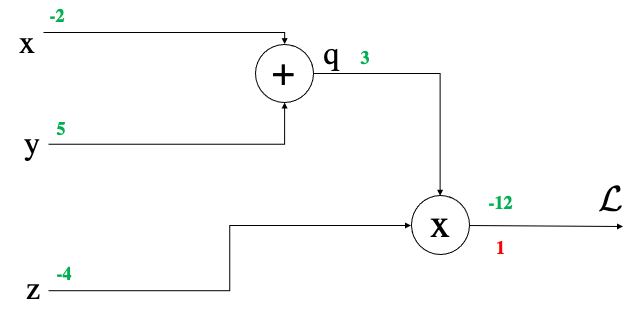


**Act as a base case for the recursion:** $$\frac{\partial\mathcal{L}}{\partial \mathcal{L}}=1$$

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

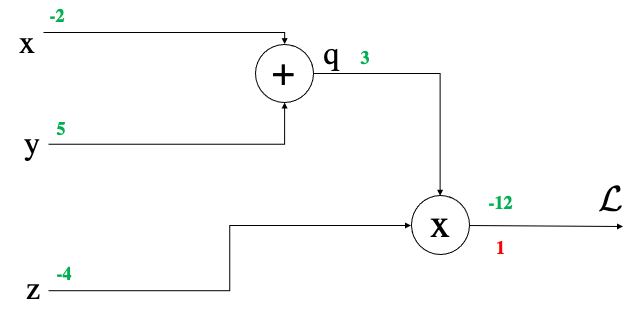


**What is the value of the gradient of $\mathcal{L}$ on $z$?**: 


**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

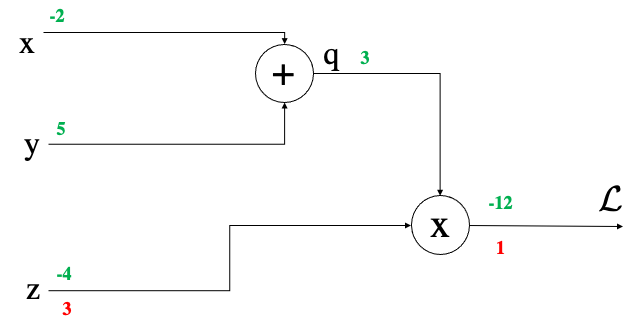

**What is the value of the gradient of $\mathcal{L}$ on $z$?**: 

$$\frac{\partial\mathcal{L}}{\partial z}= q = 3$$

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

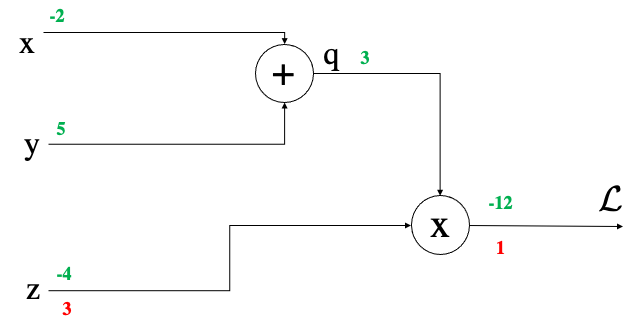

**What is the value of the gradient of $\mathcal{L}$ on $q$?**: 


**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

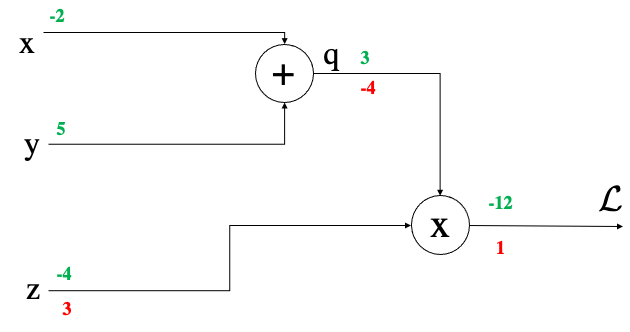

**What is the value of the gradient of $\mathcal{L}$ on $q$?**: 

$$\frac{\partial\mathcal{L}}{\partial q}= z = -4$$

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

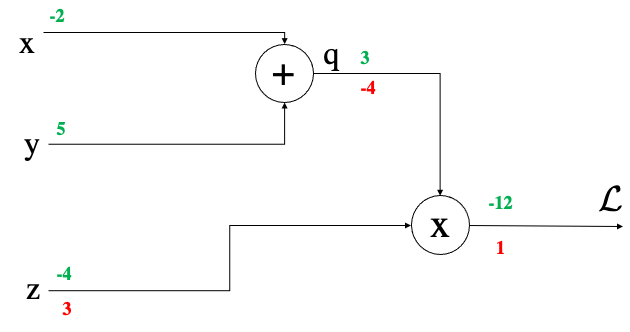

**What is the value of the gradient of $\mathcal{L}$ on $y$?**: 


**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

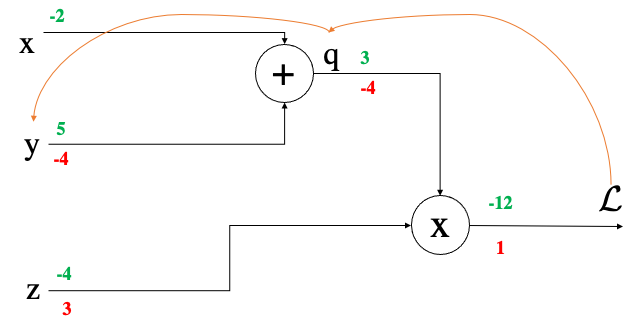

**What is the value of the gradient of $\mathcal{L}$ on $y$?**: 
$$\frac{\partial\mathcal{L}}{\partial y} = \frac{\partial\mathcal{L}}{\partial q}\frac{\partial q}{\partial y} = z\cdot 1= -4$$

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Backward Pass

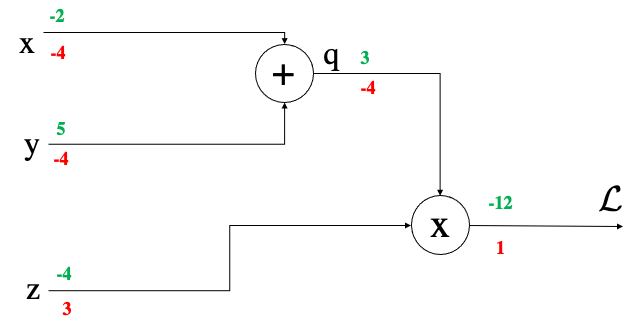

**This is what we wanted:**
$$\frac{\partial\mathcal{L}}{\partial x},\frac{\partial\mathcal{L}}{\partial y},\frac{\partial\mathcal{L}}{\partial z}$$

**This is what we have**

$$\frac{\partial\mathcal{L}}{\partial q}=z, \frac{\partial\mathcal{L}}{\partial z}=q, \frac{\partial\mathcal{q}}{\partial x}=1, \frac{\partial\mathcal{q}}{\partial y}=1$$

# Check with our manual derivation ✅

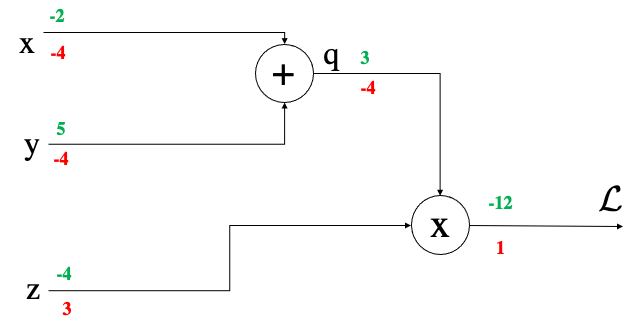

The high school way (as we did until now):

$$\frac{\partial\mathcal{L}(x,y,z)}{\partial x} =  (\mbf{x}z+yz)^{\prime}=(\mbf{x}z)^{\prime}+(yz)^{\prime} = z = -4$$
$$\frac{\partial\mathcal{L}(x,y,z)}{\partial y} =  (xz+\mbf{y}z)^{\prime}=(xz)^{\prime}+(\mbf{y}z)^{\prime} = z = -4$$
$$\frac{\partial\mathcal{L}(x,y,z)}{\partial z} =  x+y = +3 $$

# You know what? I do not trust math, I want to verify with a machine ✅

# Pytorch check
```python
from torch import tensor

def neural_net(x,y,z):
    return (x+y)*z

x, y, z = tensor(-2., requires_grad=True), tensor(5.,requires_grad=True), tensor(-4., requires_grad=True)
loss = neural_net(x,y,z) # forward pass
loss.backward()          # backward (after this I can check the gradients)
for el in [x,y,z]:
    print(el.grad)
```
```
tensor(-4.)
tensor(-4.)
tensor(3.)
```

In [6]:
from torch import tensor

def neural_net(x,y,z):
    loss = (x+y)*z
    return loss

x, y, z = tensor(-2., requires_grad=True), tensor(5.,requires_grad=True), tensor(-4., requires_grad=True)
loss = neural_net(x,y,z) # forward pass

loss.backward() #backward (ok now I can check the gradients)
for el in [x,y,z]:
    print(el.grad)

tensor(-4.)
tensor(-4.)
tensor(3.)


# General Recipe for Chain Rule over DAGs [Forward]

**Just remember that you have to do at a generic gate:**


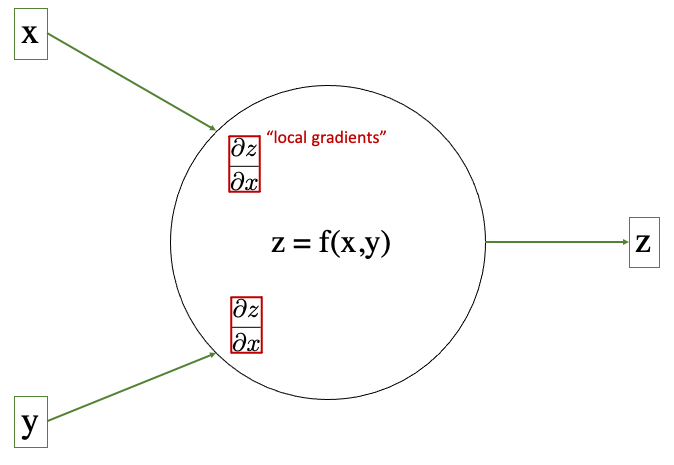

# General Recipe for Chain Rule over DAGs  [Backward]

**Multiply the gradient that you receive with your local gradient**


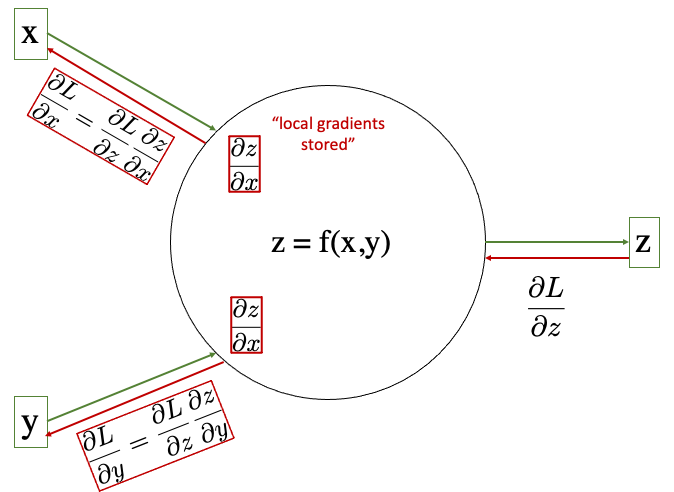

# Exam Question lookalike
$$
f(w, x)=\frac{1}{1+e^{-\left(w_{0} x_{0}+w_{1} x_{1}+b\right)}}
$$

Given the above function, can you perform **forward and backward pass** by writing all the local values and local gradient, by applying the chain rule? 

_(Direct computation of the gradient does not count for solving it, though you may be using it to double check)_

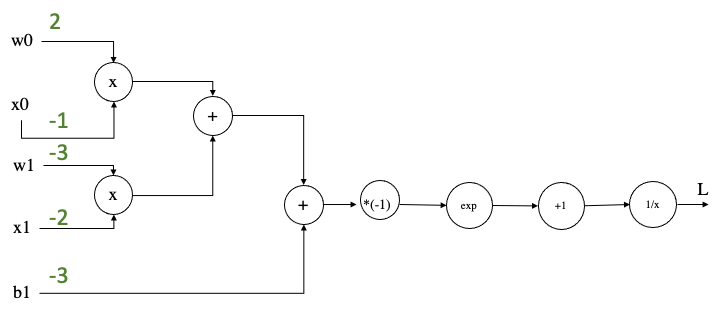


# Logistic Regression Computational Graph could be simplified

$$
f(w, x)=\frac{1}{1+e^{-\left(w_{0} x_{0}+w_{1} x_{1}+b\right)}}
$$

This is what implement the **Sigmoid Layer in Pytorch:**

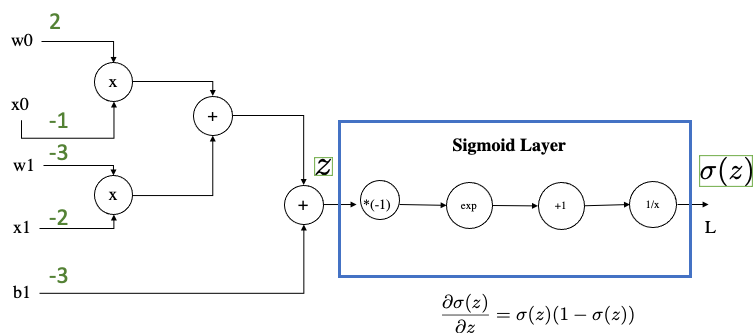

# Are we done with training neural nets?

# Not completely: till now scalars, but we have matrices and vectors!

# Now this looks more familiar

$\forall l \in [1\ldots,L]$:
1. $\mbf{W}^l \leftarrow \mbf{W}^l - \gamma \nabla_{\mbf{W}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
1. $\mbf{b}^l \leftarrow \mbf{b}^l - \gamma \nabla_{\mbf{b}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
<br><br>


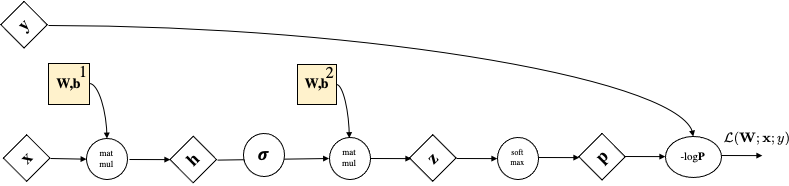

# Appendix: Gradient of Softmax wrt to its probability

# Gradient of SoftMax + CE Loss wrt to $z$

\begin{split}\begin{aligned}
\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(z_j)}{\sum_{k=1}^q \exp(z_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(z_k) - \sum_{j=1}^q y_j z_j\\
&= \log \sum_{k=1}^q \exp(z_k) - \sum_{j=1}^q y_j z_j.
\end{aligned}\end{split}

# Gradient of SoftMax + CE Loss wrt to $z$

Below we take the **partial derivative wrt to class j, so it is not in vector notation:**


$$\partial_{z_j} \mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(z_j)}{\sum_{k=1}^q \exp(z_k)} - y_j = \mathrm{softmax}(\mathbf{z})_j - y_j$$

**It is a GLM!**

# Gradient of SoftMax + CE Loss wrt to $z$

Below we take the **partial derivative wrt to class j, so it is not in vector notation:**


$$\partial_{z_j} \mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(z_j)}{\sum_{k=1}^q \exp(z_k)} - y_j = \mathrm{softmax}(\mathbf{z})_j - y_j$$

```python
p = [0.2 0.7 0.1] y =[0 1 0]

dL/dz  = [0.2 0.7-1 0.1] = [0.2 -0.3 0.1]
```

# Now this looks more familiar

$\forall l \in [1\ldots,L]$:
1. $\mbf{W}^l \leftarrow \mbf{W}^l - \gamma \nabla_{\mbf{W}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$
1. $\mbf{b}^l \leftarrow \mbf{b}^l - \gamma \nabla_{\mbf{b}^l}\mathcal{L}(\mbf{x},y;\{\mbf{W},b\})$

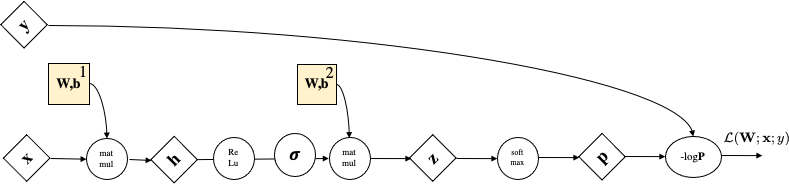

$$\chain{\mathcal{L}}{\mbf{W}^1} = \chain{\loss}{\mbf{z}}\chain{\mbf{z}}{\mbf{W}^1}$$

$$\chain{\mathcal{L}}{\mbf{W}^1} = \chain{\loss}{\mbf{z}}\underbrace{\chain{\mbf{z}}{\sigma}\chain{\mbf{\sigma}}{\mbf{W}^1}}_{\chain{\mbf{z}}{\mbf{W}^1}}$$

$$\chain{\mathcal{L}}{\mbf{W}^1} = \chain{\loss}{\mbf{z}}\chain{\mbf{z}}{\sigma}\underbrace{\chain{\mbf{\sigma}}{\mbf{h}}\chain{\mbf{h}}{\mbf{W}^1}}_{\chain{\mbf{\sigma}}{\mbf{W}^1}}$$